In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp = pd.read_csv("seoul.csv", encoding="cp949")
temp

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4
...,...,...,...,...
41626,2022-11-23,10.8,6.8,15.2
41627,2022-11-24,9.4,5.9,14.1
41628,2022-11-25,12.3,7.1,17.8
41629,2022-11-26,6.7,1.0,12.9


In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41631 entries, 0 to 41630
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41631 non-null  object 
 1   평균기온(℃)  40875 non-null  float64
 2   최저기온(℃)  40872 non-null  float64
 3   최고기온(℃)  40872 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


- '날짜' 데이터가 object로 string 타입이기 때문에 계산 불가
- 날짜를 date 타입으로 변환해줘야 한다.

In [4]:
# 날짜를 Datetime으로 바꿔주기
# 날짜는 일반 숫자 데이터와 형태가 달라 일괄적으로 처리하기 까다로움
# Datetime은 날짜 데이터를 다루기 쉽게 해준다.

temp['날짜'] = pd.to_datetime(temp['날짜'])  
temp

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4
...,...,...,...,...
41626,2022-11-23,10.8,6.8,15.2
41627,2022-11-24,9.4,5.9,14.1
41628,2022-11-25,12.3,7.1,17.8
41629,2022-11-26,6.7,1.0,12.9


- Datetime 데이터는 연/월/일을 추출할 수 있다.
- 인덱스도 추출됨

In [7]:
# dt(datetime) 요소의 year 요소 출력
print(temp['날짜'].dt.year.head())
print('')  # 뭐지?

# dt(datetime) 요소의 month 요소 출력
print(temp['날짜'].dt.month.head())
print('')

# dt(datetime) 요소의 day 요소 출력
print(temp['날짜'].dt.day.head())

0    1907
1    1907
2    1907
3    1907
4    1907
Name: 날짜, dtype: int64

0    10
1    10
2    10
3    10
4    10
Name: 날짜, dtype: int64
0    1
1    2
2    3
3    4
4    5
Name: 날짜, dtype: int64


In [8]:
# 8월 데이터만 뽑아보기
temp[temp['날짜'].dt.month == 8]

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
305,1908-08-01,26.2,24.4,29.6
306,1908-08-02,26.4,23.3,30.7
307,1908-08-03,26.9,24.2,32.0
308,1908-08-04,26.3,22.6,31.5
309,1908-08-05,27.3,23.6,32.4
...,...,...,...,...
41538,2022-08-27,21.5,17.6,25.5
41539,2022-08-28,22.6,16.1,28.4
41540,2022-08-29,21.0,19.5,22.5
41541,2022-08-30,19.1,17.9,20.3


In [10]:
# 9일 데이터만 뽑아보기
temp[temp['날짜'].dt.day == 9]

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
8,1907-10-09,11.6,3.8,21.1
39,1907-11-09,6.9,0.7,11.9
69,1907-12-09,3.2,-4.3,8.1
100,1908-01-09,-3.2,-9.3,2.0
131,1908-02-09,-7.6,-11.4,-4.1
...,...,...,...,...
41489,2022-07-09,26.9,24.0,30.9
41520,2022-08-09,25.1,22.0,26.5
41551,2022-09-09,24.3,18.9,30.8
41581,2022-10-09,13.1,10.7,14.5


In [11]:
# 8월 9일자 데이터만 뽑아보기
(temp['날짜'].dt.month == 8) & (temp['날짜'].dt.day == 9)

0        False
1        False
2        False
3        False
4        False
         ...  
41626    False
41627    False
41628    False
41629    False
41630    False
Name: 날짜, Length: 41631, dtype: bool

In [12]:
birth_day = temp[(temp['날짜'].dt.month == 8) & (temp['날짜'].dt.day == 9)]
birth_day

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
313,1908-08-09,22.4,19.8,26.7
678,1909-08-09,29.7,25.6,34.8
1043,1910-08-09,25.3,20.5,30.6
1408,1911-08-09,27.0,23.1,33.0
1774,1912-08-09,25.4,21.9,32.2
...,...,...,...,...
40059,2018-08-09,28.8,27.1,32.5
40424,2019-08-09,29.8,26.0,34.6
40790,2020-08-09,24.9,23.7,25.8
41155,2021-08-09,28.3,23.3,33.6


### 판다스로 그래프 그리는 방법
1) 데이터프레임명.그래프형태(변수)
2) 그래프형태(데이터프레임, 변수)

<Figure size 1080x504 with 0 Axes>

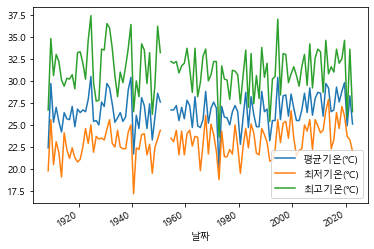

In [20]:
plt.figure(figsize=(15, 7))   # 왜 그래프 크기에 변화가 없는가?
plt.rc('font', family='Malgun Gothic')
birth_day.plot(x='날짜', y=['평균기온(℃)', '최저기온(℃)', '최고기온(℃)'])
plt.legend()
plt.show()

그래프가 중간에 끊어진것은 결측치이다.(6.25 전쟁시기)

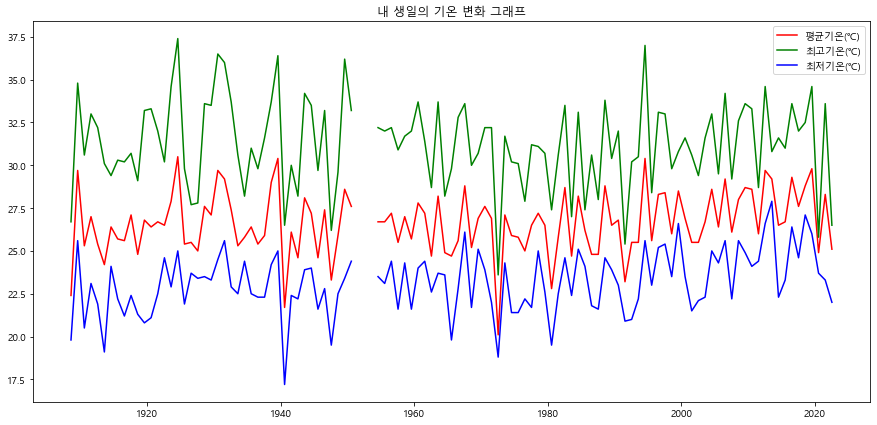

In [19]:
plt.figure(figsize=(15, 7))
plt.rc('font', family='Malgun Gothic')
plt.title('내 생일의 기온 변화 그래프')
plt.plot(birth_day['날짜'], birth_day['평균기온(℃)'], color = 'r', label = '평균기온(℃)')
plt.plot(birth_day['날짜'], birth_day['최고기온(℃)'], color = 'g', label = '최고기온(℃)')
plt.plot(birth_day['날짜'], birth_day['최저기온(℃)'], color = 'b', label = '최저기온(℃)')
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), None)

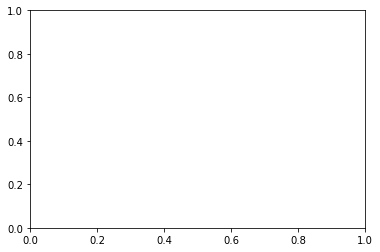

In [23]:
# 한 번에 입력, y데이터에 여러 열을 동시에 선택하기 위해 birth_day[[선택한 열]]로 묶어준다
plt.rc('font', family='NanumBarunGothic')
plt.plot(birth_day['날짜'], birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']])
plt.show()

- [[열 이름]] 특정 열을 추출해 새로운 데이터 프레임을 반환
- [열 이름] 한개의 열만 추출할 수 있으며 인덱스와 데이터가 있는 시리즈를 반환

In [24]:
print(birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']])
print('')

print(type(birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']]))
print('')

print(birth_day['평균기온(℃)'])
print('')

print(type(birth_day['평균기온(℃)']))

       평균기온(℃)  최저기온(℃)  최고기온(℃)
313       22.4     19.8     26.7
678       29.7     25.6     34.8
1043      25.3     20.5     30.6
1408      27.0     23.1     33.0
1774      25.4     21.9     32.2
...        ...      ...      ...
40059     28.8     27.1     32.5
40424     29.8     26.0     34.6
40790     24.9     23.7     25.8
41155     28.3     23.3     33.6
41520     25.1     22.0     26.5

[113 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>

313      22.4
678      29.7
1043     25.3
1408     27.0
1774     25.4
         ... 
40059    28.8
40424    29.8
40790    24.9
41155    28.3
41520    25.1
Name: 평균기온(℃), Length: 113, dtype: float64

<class 'pandas.core.series.Series'>


## 기온 데이터 시각화

In [25]:
# aug: 8월 기온
# jan: 1월 기온
aug = temp[temp['날짜'].dt.month == 8]['최고기온(℃)']
jan = temp[temp['날짜'].dt.month == 1]['최고기온(℃)']

C:\Users\helen\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


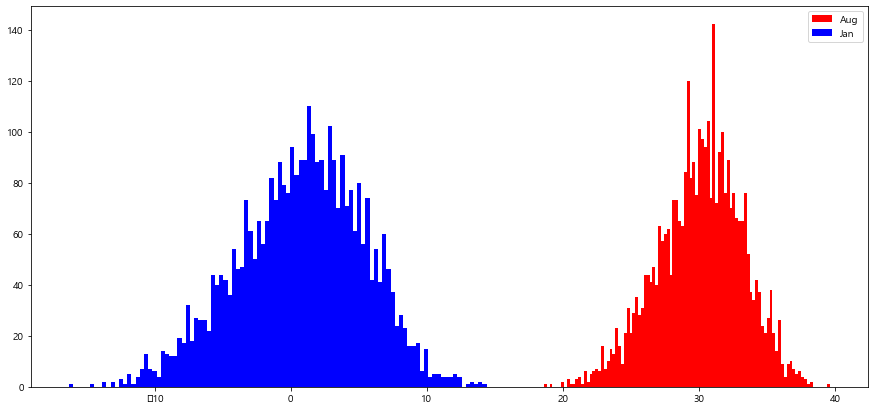

In [27]:
plt.figure(figsize=(15,7))
plt.rc('font', family='Malgun Gothic')
plt.hist(aug, bins = 100, color='r', label = 'Aug')
plt.hist(jan, bins = 100, color='b', label = 'Jan')  
plt.legend()
plt.show()

# error: color를 안썼더니 그래프가 안나옴

In [28]:
# 코드 입력 방식 두 가지(같은 결과값)

print(temp['최고기온(℃)'][temp['날짜'].dt.month == 8])
print('')

print(temp[temp['날짜'].dt.month == 8]['최고기온(℃)'])

305      29.6
306      30.7
307      32.0
308      31.5
309      32.4
         ... 
41538    25.5
41539    28.4
41540    22.5
41541    20.3
41542    24.9
Name: 최고기온(℃), Length: 3503, dtype: float64

305      29.6
306      30.7
307      32.0
308      31.5
309      32.4
         ... 
41538    25.5
41539    28.4
41540    22.5
41541    20.3
41542    24.9
Name: 최고기온(℃), Length: 3503, dtype: float64


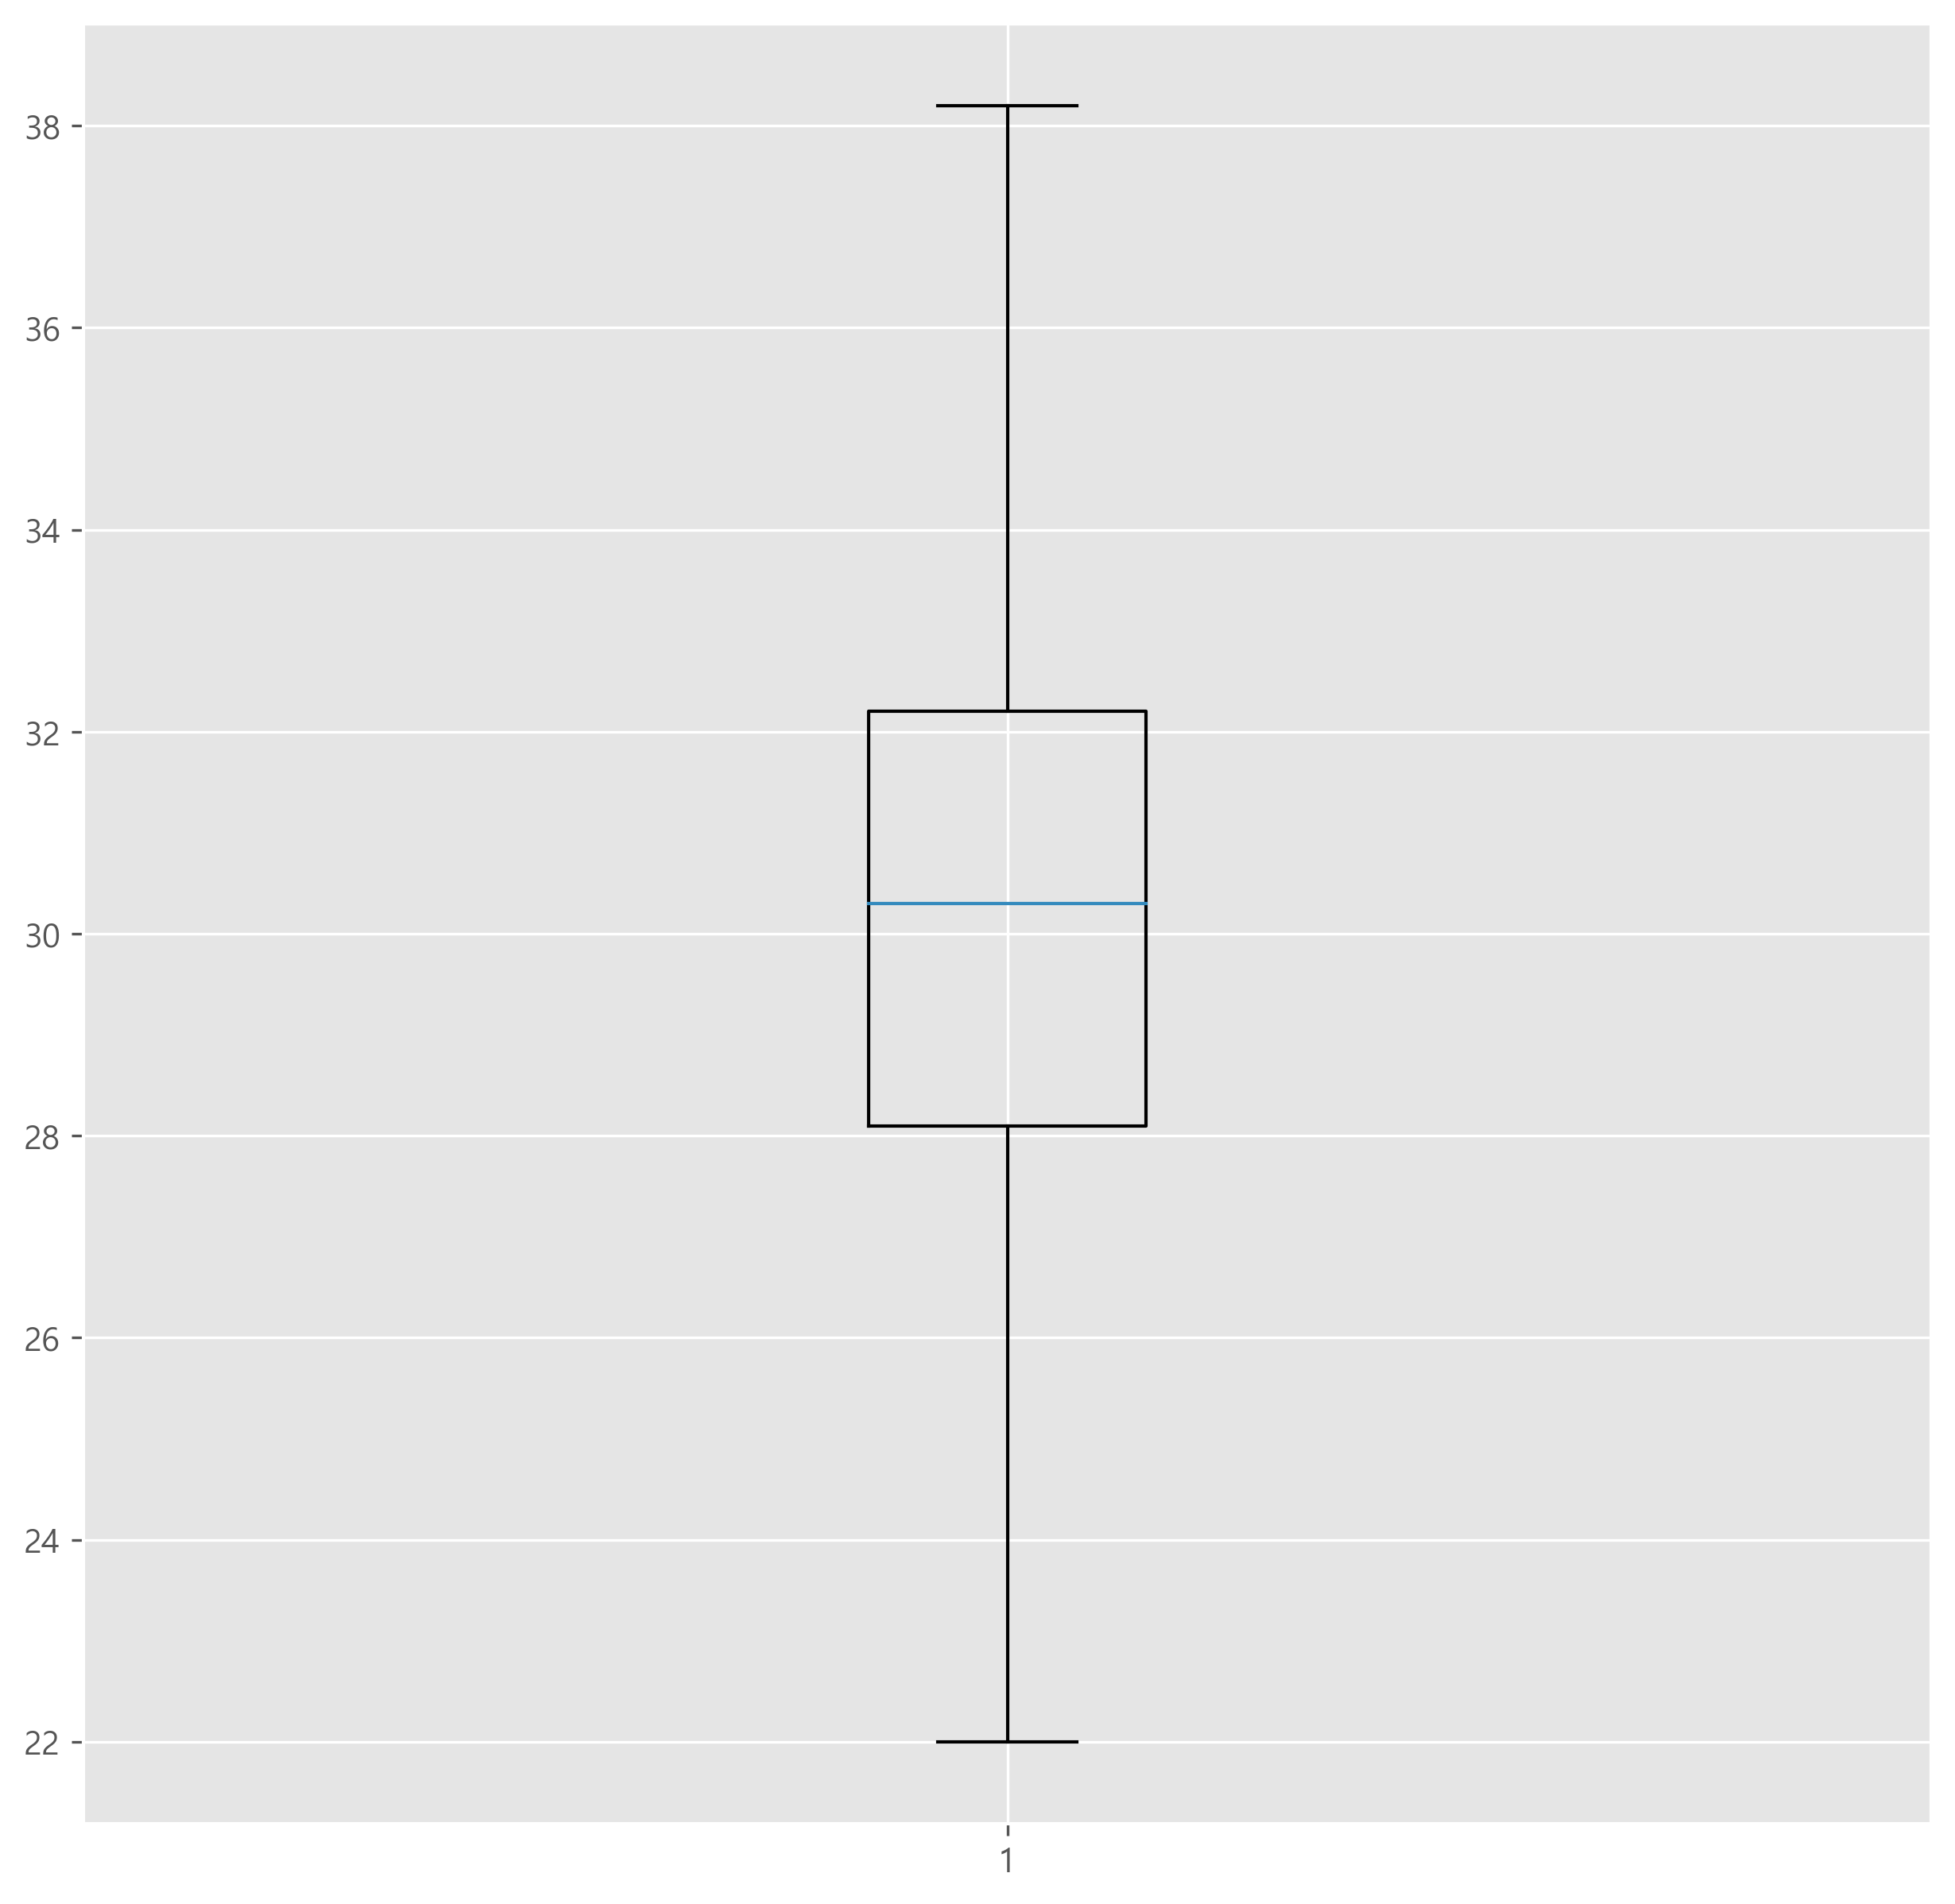

In [31]:
# 8월 기온을 박스로 그리기
# plt.boxplot은 입력 데이터를 시퀀스로 받기 떄문에 판다스 시리즈를 변환해줘야 한다
# .values 사용
# 결측치가 존재할 경우 날짜 인덱스가 있던 다른 그래프와 달리 bowplot은 그려지지 않는다. 
# 때문에 결측치를 제거해 준다. -> dropna() 함수 사용

plt.style.use('ggplot')
plt.figure(figsize=(10,10), dpi = 300)
plt.boxplot(aug.dropna().values, showfliers = False)  # showfliers:
plt.show()